# Citizen Satisfaction with the South African Police Service

In [1]:
#import libraries
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

# Executive summary

The purpose of this notebook is to perform the data analysis procedure to identify real world trends or issues in South Africa that may help improve the country in some way. We model the citizen general satisfaction with the South African Police Service (SAPS) to see what variables influence it. The main result shows that there is a joint relationship between the race, some locations, police visibility, trust in the SAPS, levels of violent and property crime to the general satisfaction with SAPS in South Africa. The study is limited to the people that took the surveys therefore limitations are that it is not representative of the the whole population and that the data is purely categorical which is difficult to work with and interpret.

# 1. Introduction

South Africa is a country that is known for its high crime rates and over the past few years due to increased unemployment rates, poverty and bad economic performance, the crime rates have been increasing. To help mitigate the effects of the high crime rates the citizens of the country relies on the South African Police Service (SAPS). 

### Research question:
Are the citizens satisfied with the performance and service of the South African Police Service and what factors might affect their satisfaction?

We shall explore and attempt to answer the above question by analyzing all chosen variables. We need to take an in-depth look at citizens, does satisfaction of the citizens differ between genders, does their location (province) play a role on their views, or does opinion differ among race etc. Do citizens have access to police institutions in their areas, do they trust the police in their areas, these may be contributing factors that will enable us to answer our research question. Police performance factors may also influence citizens view such as police presence in their communities, whether violent crime and property crime are being dealt with effectively may also provide insight to citizen satisfaction and shall be analyzed.

### Hypothesis
There is a relationship between genders, location, race, access to police institutions, trust in the police, police presence, views of violent, property crime and general satisfaction with police service in South Africa.

#### Methodology

A brief overview of the methodology is as follows:

1. Read in the data and store in dataframes. Proceed to remove observations with unspecified values for each variable.
2. Encode variables except the response variable using functions from the pandas library then drop the first dummy variable for each feature.
3. Create exploratory plots such as correlation plots and rate of change plots with a few explanatorry variables and the response variable.
4. Perform intial modelling with formulas using logistic regression from the statsmodel library.
5. Feature selection is performed by stepwise logistic regression and forward selection.
5. Hypothesis testing/inference is performed through the use of bootstrapping with selected variables for a final model and creation of a distribution for each of the regression coefficients is completed. After this, calculations of the confidence intervals for each of the coefficients are computed.
6. Interpreting results for the hypothesis testing and conclusion.

#### Sections content overview

#### Section 2
Data description - Information about datasets.
#### Section 3
Data wrangling - Tidyness and techniques used to clean data as well as sense checks.
#### Section 4
Exploratory analysis - Visualizations and statistics.
#### Section 5
Initial modelling
#### Section 6
Feature Selection
#### Section 7
Hypothesis testing/Inference
#### Section 8
Change of coefficients over time
#### Section 9
Conclusion


# 2. Data description

The datasets utilized in this project are the Victims of Crime Surveys (VOCS) from 2015 to 2018 that is published by Statistics South Africa, and were downloaded on 08-03-2020.

The surveys contain information about the prevalence of particular kinds of crime and was collected from households and workers' hostels across all nine provinces. We will be utilizing data from 2015-2018, this enables us to view changes over time and trends in individual years. There are numerous variables in these datasets but this study will only consider a few and they will be briefly described below with their respective values. The surveys mostly contain categorical data.

##### GENDER 

 1 = Male
 <br>
 2 = Female

##### PROVINCE 

 1 = Western Cape
 <br>
 2 = Eastern Cape
 <br>
 3 = Northern Cape
 <br>
 4 = Free State
 <br>
 5 = KwaZulu-Natal
 <br>
 6 = North West
 <br>
 7 = Gauteng
 <br>
 8 = Mpumalanga
 <br>
 9 = Limpopo

##### POPULATION 

 1 = Black African
 <br>
 2 = Coloured
 <br>
 3 = Indian/Asian
 <br>
 4 = White

##### GENERAL TRUST IN SAPS

 1 = Yes
 <br>
 2 = No
 <br>
 9 = Unspecified

##### SATISFIED WITH POLICE SERVICE IN GENERAL

 1 = Yes
 <br>
 2 = No
 <br>
 9 = Unspecified

##### Police officers on duty (visible)

 1 = At least once a day
 <br>
 2 = At least once a week
 <br>
 3 = At least once a month
 <br>
 4 = More than once a month
 <br>
 5 = Never
 <br>
 9 = Unspecified

##### Access to (police) institutions
 1 = Yes
 <br>
 2 = No
 <br>
 9 = Unspecified

##### Level of violent crime
 1 = Increased
 <br>
 2 = Decreased
 <br>
 3 = Stayed the same
 <br>
 9 = Unspecified
 
##### Level of property crime
 1 = Increased
 <br>
 2 = Decreased
 <br>
 3 = Stayed the same
 <br>
 9 = Unspecified

#### Date collected
1. The Victims of Crime Survey 2017-2018 was collected partially in 2017 and 2018.
2. The Victims of Crime Survey 2016-2017 was collected partially in 2016 and 2017.
3. The Victims of Crime Survey 2015-2016 was collected partially in 2015 and 2016.
4. The Victims of Crime Survey 2014-2015 was collected partially in 2014 and 2015.

#### Collection method for surveys
Questionnaires were used in face to face meetings to gather the data. These questionnaires were based on the International Crime Victim Survey (ICVS).

#### Dataset sizes
1. VOCS 2017-2018 (rows: 21190, columns: 779)
2. VOCS 2016-2017 (rows: 21095, columns: 820)
3. VOCS 2015-2016 (rows: 21374, columns: 880)
4. VOCS 2014-2015 (rows: 24701, columns: 735)

#### Aspects of data
The first aspects we look at is validity and consistency of the data, the data was checked for valid range, logic and consistency as part of the post-capture process. At each stage of checking, data was edited to ensure consistency. The focus of the editing process was on clearing skip violations and makinfg sure that each variable only contained valid values. Very few limits to valid values were set and data was largely released as it was received from the field. When dealing with internal inconsistencies, as much as allowed was completed using logical imputation. If the internal consistency remained, the question subsequent to the filter question is dealt with by either setting it to missing and imputing its value or flagged for further investigation.

In terms of accuracy the data has good estimates at the provincial level although a few categories were under reported such as sexual violence, for completeness missing values were imputed or filled with numerical values and in terms of uniformity, all columns are of int64 datatype which is the correct datatype for this set of data.

#### Ability of data to answer question
The datasets contain variables about whether or not a person was satisfied with police service, as well the province, gender and race of each person. Further variables contained includes whether the person trusts the South African police service, the frequency of police visibility in the person's neighbourhood, a citizens's access to police institutions and their views on levels of violent and property crime. Therefore the datasets do possess variables that can help answer our question in a clear and concise manner, actual suitability will be determined in stages below.

# 3. Data Wrangling
### Read in Data
In this section the four datasets are read in and required subsets are created. Checks for null values are used on each dataset and column labels for variables are changed for ease of access in later stages. For each dataset the unspecified values are filtered out to improve modelling, a year column is added and the response variable 'Satisfied_SAPS_Gen' is changed to zeros and ones. After these steps are completed, an excerpt of each dataset is printed out to show structure before filtering and after filtering.

In [2]:
data_labels = ['Access_police','Level_pc','Level_vc','Officers_Visible','Province', 'Race', 'Gender', 'Trust_SAPS', 'Satisfied_SAPS_Gen' ]

#import dataset
data = pd.read_csv('vcs-2017-2018-v1-hh.csv')
#Take required subset 
d_2018 = data[['Q372Police','Q24PropCrime','Q23LeviolCrime','Q69Visible','pr_code','race','gender','Q613SAPS', 'Q66Satisfied']]
#Change labels of columns
d_2018.columns = data_labels
#Check for nulls
print(d_2018.isnull().sum())
#Remove unspecified values
d_2018_filtered = d_2018[d_2018['Officers_Visible']<9]
d_2018_filtered = d_2018_filtered[d_2018_filtered['Trust_SAPS']<9]
d_2018_filtered = d_2018_filtered[d_2018_filtered['Satisfied_SAPS_Gen']<9]
d_2018_filtered = d_2018_filtered[d_2018_filtered['Level_vc']<9]
d_2018_filtered = d_2018_filtered[d_2018_filtered['Level_pc']<9]
d_2018_filtered = d_2018_filtered[d_2018_filtered['Access_police']<9]
#Add year column
d_2018_filtered.loc[:,'Year']=2018
#Change response variable to 0's and 1's
d_2018_filtered['Satisfied_SAPS_Gen'] = (d_2018_filtered.Satisfied_SAPS_Gen==1).astype(int)

Access_police         0
Level_pc              0
Level_vc              0
Officers_Visible      0
Province              0
Race                  0
Gender                0
Trust_SAPS            0
Satisfied_SAPS_Gen    0
dtype: int64


In [3]:
#Excerpt of data before filtering
d_2018.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen
0,2,3,3,4,1,4,1,1,1
1,2,3,3,2,1,1,1,1,1
2,1,1,3,1,1,2,1,1,1
3,1,1,3,1,1,2,1,1,1
4,1,1,3,1,1,2,1,1,2
5,1,1,3,1,1,2,1,1,1
6,1,1,3,2,1,2,1,1,2
7,1,1,2,1,1,2,1,1,1
8,1,1,1,1,1,2,2,1,1
9,2,3,3,2,1,2,2,1,1


In [4]:
#Excerpt of data after filtering
d_2018_filtered.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen,Year
0,2,3,3,4,1,4,1,1,1,2018
1,2,3,3,2,1,1,1,1,1,2018
2,1,1,3,1,1,2,1,1,1,2018
3,1,1,3,1,1,2,1,1,1,2018
4,1,1,3,1,1,2,1,1,0,2018
5,1,1,3,1,1,2,1,1,1,2018
6,1,1,3,2,1,2,1,1,0,2018
7,1,1,2,1,1,2,1,1,1,2018
8,1,1,1,1,1,2,2,1,1,2018
9,2,3,3,2,1,2,2,1,1,2018


In [5]:
#import dataset
data1 =  pd.read_csv('vcs-2016-2017-hh-v1.csv')
#Take required subset 
d_2017 = data1[['Q372Police','Q24PropCrime','Q23LeviolCrime','Q69Visible','prov','e_population','c_gender','Q613SAPS', 'Q66Satisfied']]
#Change labels of columns
d_2017.columns = data_labels
#Check for nulls
print(d_2017.isnull().sum())
#Remove unspecified values
d_2017_filtered = d_2017[d_2017['Officers_Visible']<9]
d_2017_filtered = d_2017_filtered[d_2017_filtered['Trust_SAPS']<9]
d_2017_filtered = d_2017_filtered[d_2017_filtered['Satisfied_SAPS_Gen']<9]
d_2017_filtered = d_2017_filtered[d_2017_filtered['Level_vc']<9]
d_2017_filtered = d_2017_filtered[d_2017_filtered['Level_pc']<9]
d_2017_filtered = d_2017_filtered[d_2017_filtered['Access_police']<9]
#Add year column
d_2017_filtered.loc[:,'Year']=2017
#Change response variable to 0's and 1's
d_2017_filtered['Satisfied_SAPS_Gen'] = (d_2017_filtered.Satisfied_SAPS_Gen==1).astype(int)

Access_police         0
Level_pc              0
Level_vc              0
Officers_Visible      0
Province              0
Race                  0
Gender                0
Trust_SAPS            0
Satisfied_SAPS_Gen    0
dtype: int64


In [6]:
#Excerpt of data before filtering
d_2017.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen
0,2,3,3,4,1,2,1,1,1
1,1,3,3,4,1,1,1,1,1
2,1,1,3,4,1,1,1,1,1
3,1,1,1,1,1,2,1,1,1
4,1,1,1,4,1,2,2,1,2
5,1,1,3,2,1,2,2,2,2
6,2,1,1,2,1,2,2,2,1
7,2,1,1,2,1,2,1,2,2
8,1,1,3,1,1,2,1,1,1
9,2,3,3,1,1,2,2,1,1


In [7]:
#Excerpt of data after filtering
d_2017_filtered.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen,Year
0,2,3,3,4,1,2,1,1,1,2017
1,1,3,3,4,1,1,1,1,1,2017
2,1,1,3,4,1,1,1,1,1,2017
3,1,1,1,1,1,2,1,1,1,2017
4,1,1,1,4,1,2,2,1,0,2017
5,1,1,3,2,1,2,2,2,0,2017
6,2,1,1,2,1,2,2,2,1,2017
7,2,1,1,2,1,2,1,2,0,2017
8,1,1,3,1,1,2,1,1,1,2017
9,2,3,3,1,1,2,2,1,1,2017


In [8]:
#import dataset
data2 =  pd.read_csv('vcs-2015-2016-hh-v1.csv')
#Take required subset 
d_2016 = data2[['Q362Police','Q24PropCrime','Q23LeviolCrime','Q610Visible','prov','e_population','c_gender','Q614SAPS', 'Q67Satisfied']]
#Change labels of columns
d_2016.columns = data_labels
#Check for nulls
print(d_2016.isnull().sum())
#Remove unspecified values
d_2016_filtered = d_2016[d_2016['Officers_Visible']<5]
d_2016_filtered = d_2016_filtered[d_2016_filtered['Trust_SAPS']<9]
d_2016_filtered = d_2016_filtered[d_2016_filtered['Satisfied_SAPS_Gen']<9]
d_2016_filtered = d_2016_filtered[d_2016_filtered['Level_vc']<9]
d_2016_filtered = d_2016_filtered[d_2016_filtered['Level_pc']<9]
d_2016_filtered = d_2016_filtered[d_2016_filtered['Access_police']<9]
#Add year column
d_2016_filtered.loc[:,'Year']=2016
#Change response variable to 0's and 1's
d_2016_filtered['Satisfied_SAPS_Gen'] = (d_2016_filtered.Satisfied_SAPS_Gen==1).astype(int)

Access_police         0
Level_pc              0
Level_vc              0
Officers_Visible      0
Province              0
Race                  0
Gender                0
Trust_SAPS            0
Satisfied_SAPS_Gen    0
dtype: int64


In [9]:
#Excerpt of data before filtering
d_2016.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen
0,1,3,3,2,1,2,1,1,1
1,1,3,3,5,1,1,2,1,1
2,1,1,1,3,1,2,1,2,2
3,1,3,3,2,1,2,2,1,1
4,1,1,3,1,1,2,1,1,1
5,2,1,3,2,1,2,1,1,1
6,1,3,3,1,1,2,1,1,1
7,2,1,2,2,1,2,2,2,2
8,1,1,2,9,1,2,1,1,1
9,1,1,3,5,1,4,1,1,1


In [10]:
#Excerpt of data after filtering
d_2016_filtered.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen,Year
0,1,3,3,2,1,2,1,1,1,2016
2,1,1,1,3,1,2,1,2,0,2016
3,1,3,3,2,1,2,2,1,1,2016
4,1,1,3,1,1,2,1,1,1,2016
5,2,1,3,2,1,2,1,1,1,2016
6,1,3,3,1,1,2,1,1,1,2016
7,2,1,2,2,1,2,2,2,0,2016
10,2,3,3,1,1,2,2,1,0,2016
11,2,3,3,1,1,2,1,1,1,2016
12,2,1,3,1,1,2,1,1,1,2016


In [11]:
#import dataset
data3 = pd.read_csv('vocs-2014-2015-household-v1-20160315.csv')
#Take required subset 
d_2015 = data3[['Q362Police','Q25PropCrime','Q24LeviolCrime','Q611Visible','PROV','race','Gender','Q615SAPS', 'Q68Satisfied']]
#Change labels of columns
d_2015.columns = data_labels
#Check for nulls
print(d_2015.isnull().sum())
d_2015_filtered = d_2015[d_2015['Officers_Visible']<5]
d_2015_filtered = d_2015_filtered[d_2015_filtered['Trust_SAPS']<9]
d_2015_filtered = d_2015_filtered[d_2015_filtered['Satisfied_SAPS_Gen']<9]
d_2015_filtered = d_2015_filtered[d_2015_filtered['Level_vc']<9]
d_2015_filtered = d_2015_filtered[d_2015_filtered['Level_pc']<9]
d_2015_filtered = d_2015_filtered[d_2015_filtered['Access_police']<9]
#Add year column
d_2015_filtered.loc[:,'Year']=2015
#Change response variable to 0's and 1's
d_2015_filtered['Satisfied_SAPS_Gen'] = (d_2015_filtered.Satisfied_SAPS_Gen==1).astype(int)

Access_police         0
Level_pc              0
Level_vc              0
Officers_Visible      0
Province              0
Race                  0
Gender                0
Trust_SAPS            0
Satisfied_SAPS_Gen    0
dtype: int64


In [12]:
#Excerpt of data before filtering
d_2015.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen
0,2,3,3,1,1,2,1,1,1
1,2,3,3,1,1,2,1,1,1
2,1,1,3,1,1,2,1,1,1
3,1,1,1,1,1,2,2,1,1
4,2,1,1,1,1,2,1,1,1
5,2,1,1,1,1,2,1,2,2
6,1,3,3,5,1,2,1,1,1
7,1,3,3,1,1,2,1,1,1
8,1,3,3,9,1,4,1,1,1
9,1,3,3,1,1,4,1,1,1


In [13]:
#Excerpt of data after filtering
d_2015_filtered.head(10)

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen,Year
0,2,3,3,1,1,2,1,1,1,2015
1,2,3,3,1,1,2,1,1,1,2015
2,1,1,3,1,1,2,1,1,1,2015
3,1,1,1,1,1,2,2,1,1,2015
4,2,1,1,1,1,2,1,1,1,2015
5,2,1,1,1,1,2,1,2,0,2015
7,1,3,3,1,1,2,1,1,1,2015
9,1,3,3,1,1,4,1,1,1,2015
11,1,1,1,1,1,2,1,1,1,2015
12,1,3,3,2,1,4,2,1,0,2015


The filtered datasets above are concatenated below for the purpose of the exploratory analysis. The number records for each year's data before filtering and after filtering is also show below as a sense check. 

In [14]:
#Concatenate filtered data
d_all = pd.concat([d_2015_filtered, d_2016_filtered, d_2017_filtered, d_2018_filtered], join='inner', ignore_index=True)
d_all

,Access_police,Level_pc,Level_vc,Officers_Visible,Province,Race,Gender,Trust_SAPS,Satisfied_SAPS_Gen,Year
0,2,3,3,1,1,2,1,1,1,2015
1,2,3,3,1,1,2,1,1,1,2015
2,1,1,3,1,1,2,1,1,1,2015
3,1,1,1,1,1,2,2,1,1,2015
4,2,1,1,1,1,2,1,1,1,2015
...,...,...,...,...,...,...,...,...,...,...
76086,1,2,2,4,9,1,1,2,0,2018
76087,1,2,2,3,9,1,2,1,1,2018
76088,1,2,2,4,9,1,1,1,1,2018
76089,1,2,2,1,9,1,2,1,1,2018


In [15]:
#Number of observations and Sense check
print('Number of records per year raw data:')
print('2018: {:}'.format(d_2018.shape[0]))
print('2017: {:}'.format(d_2017.shape[0]))
print('2016: {:}'.format(d_2016.shape[0]))
print('2015: {:}'.format(d_2015.shape[0]))

print('Number of records per year filtered data:')
print('2018: {:}'.format(d_2018_filtered.shape[0]))
print('2017: {:}'.format(d_2017_filtered.shape[0]))
print('2016: {:}'.format(d_2016_filtered.shape[0]))
print('2015: {:}'.format(d_2015_filtered.shape[0]))

Number of records per year raw data:
2018: 21190
2017: 21095
2016: 21374
2015: 24701
Number of records per year filtered data:
2018: 19583
2017: 20475
2016: 16554
2015: 19479


### Encode Variables
Each of the filtered dataset's variables except our response variable are encoded below. The last dummy variable of each category/main variable is then dropped manually. The use of these datasets are seen in later stages.

In [16]:
#Create dummy variables
data_labels_new = ['Access_police','Level_pc','Level_vc','Officers_Visible','Province', 'Race', 'Gender', 'Trust_SAPS' ]
d_2018_dummies = pd.get_dummies(d_2018_filtered, columns=data_labels_new, drop_first=True)
d_2017_dummies = pd.get_dummies(d_2017_filtered, columns=data_labels_new, drop_first=True)
d_2016_dummies = pd.get_dummies(d_2016_filtered, columns=data_labels_new, drop_first=True)
d_2015_dummies = pd.get_dummies(d_2015_filtered, columns=data_labels_new, drop_first=True)

d_all_dummies = pd.get_dummies(d_all, columns=data_labels, drop_first=False)
d_all_dummies.head(10)

,Year,Access_police_1,Access_police_2,Level_pc_1,Level_pc_2,Level_pc_3,Level_vc_1,Level_vc_2,Level_vc_3,Officers_Visible_1,...,Race_1,Race_2,Race_3,Race_4,Gender_1,Gender_2,Trust_SAPS_1,Trust_SAPS_2,Satisfied_SAPS_Gen_0,Satisfied_SAPS_Gen_1
0,2015,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,2015,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
2,2015,1,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,2015,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
4,2015,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,1
5,2015,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,1,0
6,2015,1,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
7,2015,1,0,0,0,1,0,0,1,1,...,0,0,0,1,1,0,1,0,0,1
8,2015,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,1
9,2015,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0


In [17]:
d_2018_dummies.head()

,Satisfied_SAPS_Gen,Year,Access_police_2,Level_pc_2,Level_pc_3,Level_vc_2,Level_vc_3,Officers_Visible_2,Officers_Visible_3,Officers_Visible_4,...,Province_5,Province_6,Province_7,Province_8,Province_9,Race_2,Race_3,Race_4,Gender_2,Trust_SAPS_2
0,1,2018,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,2018,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2018,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,2018,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2018,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4. Exploratory Analyses
Function below enables hiding of code blocks.

In [18]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

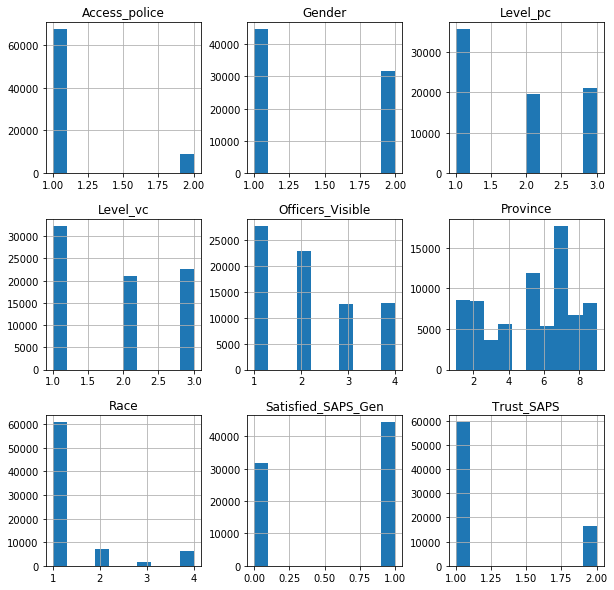

In [19]:
#1st PLOT
rcParams['figure.figsize'] = 10, 10
copy = d_all.copy()
copy = copy.drop(['Year'], axis=1)
copy.hist()
pl.show()
hide_toggle()

The graphs above depicts the counts for each category with respect to each variable in the dataset. The first graph, 'Access_police' shows that a majority of citizens have access to police institutions which may improve satisfaction with SAPS if they require assistance. The 'Gender' graph shows us that there is a larger male representation in our data, while 'Level_pc' and 'Level_vc' show that a majority of citizens feel that crime has increased or remained the same. The 'Officers_Visible' graph informs us that a large amount of citizens see police officers on duty at least once a day or once a week which may lead to more confidence in the SAPS and therefore satisfaction with their service. The 'Race' graph shows the amount of citizens per race group that took part in the surveys, a majority of participants, as seen on the graph came from the Black/African race group. The 'Satisfied_SAPS_Gen' graph shows that more citizens were satisfied in general, with the SAPS and the 'Trust_SAPS' graph shows that a majority of participants trust the SAPS. All variables were considered individually in the above graphs and are therefore not reliable as many factors may affect the general citizen satisfaction with SAPS.

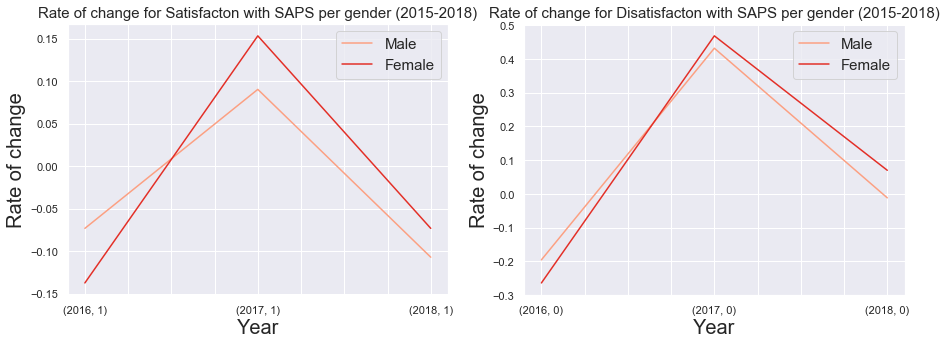

In [20]:
#2ND PLOT
a1 = d_all.groupby(['Year', 'Satisfied_SAPS_Gen'])['Gender'].value_counts().unstack()
b1 = a1.copy()
a1 = a1.drop([(2015,0), (2016,0), (2017,0), (2018,0)])
b1= b1.drop([(2015,0), (2016,0), (2017,0), (2018,0)])
a1.columns = ['Male', 'Female']
b1.columns = ['Male', 'Female']
a1=a1.drop(['Female'], axis=1)
b1=b1.drop(['Male'], axis=1)

a2 = d_all.groupby(['Year', 'Satisfied_SAPS_Gen'])['Gender'].value_counts().unstack()
b2 = a2.copy()
a2 = a2.drop([(2015,1),(2016,1), (2017,1), (2018,1)])
b2= b2.drop([(2015,1), (2016,1), (2017,1), (2018,1)])
a2.columns = ['Male', 'Female']
b2.columns = ['Male', 'Female']
a2=a2.drop(['Female'], axis=1)
b2=b2.drop(['Male'], axis=1)

sns.set()
sns.set_palette("Reds", n_colors=2)
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(121)

a1.pct_change().plot(ax=ax)
b1.pct_change().plot(ax=ax)
plt.legend(['Male','Female'],fancybox=True,fontsize=15)
plt.title('Rate of change for Satisfacton with SAPS per gender (2015-2018)',fontsize=15)
#plt.xticks(np.arange(2015, 2018, 1))  
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rate of change',fontsize=20)

ax = plt.subplot(122)
a2.pct_change().plot(ax=ax)
b2.pct_change().plot(ax=ax)
plt.legend(['Male','Female'],fancybox=True,fontsize=15)
plt.title('Rate of change for Disatisfacton with SAPS per gender (2015-2018)',fontsize=15)
#plt.xticks(np.arange(2015, 2018, 1))  
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rate of change',fontsize=20)
hide_toggle()

Above we have the 'Rate of change for Satisfaction with SAPS per gender' on the left, in this graph we can clearly see the decrease in satisfaction with SAPS, the rate of change is negative from 2015 to 2016 for both genders and stays in the negative region upto 2018, this implies a general decline in satisfaction. 'Rate of change for Disatisfaction with SAPS per gender is seen on the right, although a decrease in disatisfaction is seen from 2015 to 2016, there is a general trend of a growing disatisfation from 2016 to 2018 for both genders.

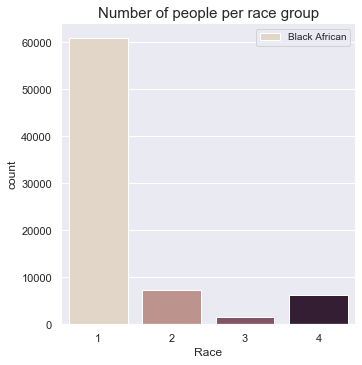

In [21]:
#3rd PLOT
sns.catplot(x="Race", kind="count", palette="ch:.25", data=d_all)
plt.title('Number of people per race group',fontsize=15)
plt.legend(['Black African'],fancybox=True,fontsize=10)
hide_toggle()

The graph above, 'Number of people per race group', depicts the approximate total number of people per race who participated in the Victims of Crime Surveys from 2015 to 2018. The 'Black African' race group is labelled since the group contributed the most to the surveys.

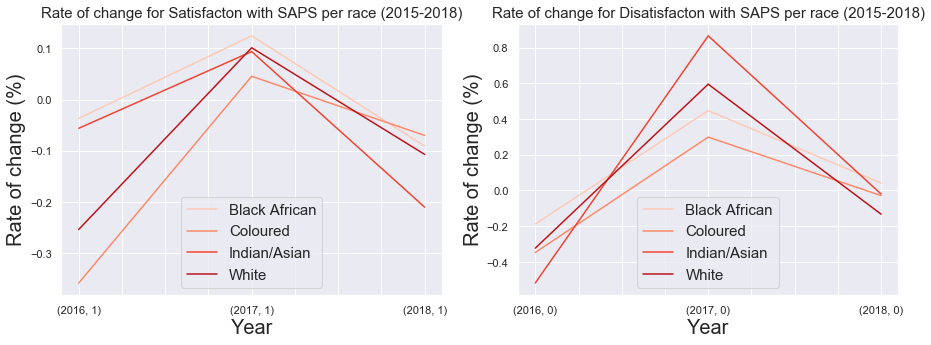

In [22]:
#3RD PLOT
a1 = d_all.groupby(['Year', 'Satisfied_SAPS_Gen'])['Race'].value_counts().unstack()
b1 = a1.copy()
c1 = a1.copy()
d1 = a1.copy()
a1 = a1.drop([(2015,0),(2016,0), (2017,0), (2018,0)])
b1= b1.drop([(2015,0), (2016,0), (2017,0), (2018,0)])
c1 = c1.drop([(2015,0),(2016,0), (2017,0), (2018,0)])
d1= d1.drop([(2015,0), (2016,0), (2017,0), (2018,0)])

a1.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
b1.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
c1.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
d1.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']

a1=a1.drop(['Coloured', 'Indian/Asian', 'White'], axis=1)
b1=b1.drop(['Black African', 'Indian/Asian', 'White' ], axis=1)
c1=c1.drop(['Black African', 'Coloured', 'White'], axis=1)
d1=d1.drop(['Black African', 'Coloured', 'Indian/Asian'], axis=1)

a2 = d_all.groupby(['Year', 'Satisfied_SAPS_Gen'])['Race'].value_counts().unstack()
b2 = a2.copy()
c2 = a2.copy()
d2 = a2.copy()

a2 = a2.drop([(2015,1),(2016,1), (2017,1), (2018,1)])
b2 = b2.drop([(2015,1), (2016,1), (2017,1), (2018,1)])
c2 = c2.drop([(2015,1),(2016,1), (2017,1), (2018,1)])
d2 = d2.drop([(2015,1), (2016,1), (2017,1), (2018,1)])

a2.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
b2.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
c2.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']
d2.columns = ['Black African', 'Coloured', 'Indian/Asian', 'White']

a2=a2.drop(['Coloured', 'Indian/Asian', 'White'], axis=1)
b2=b2.drop(['Black African', 'Indian/Asian', 'White' ], axis=1)
c2=c2.drop(['Black African', 'Coloured', 'White'], axis=1)
d2=d2.drop(['Black African', 'Coloured', 'Indian/Asian'], axis=1)

sns.set()
sns.set_palette("Reds", n_colors=4)
fig= plt.figure(figsize=(15,5))
ax = plt.subplot(121)
#Rate of change
a1.pct_change().plot(ax=ax)
b1.pct_change().plot(ax=ax)
c1.pct_change().plot(ax=ax)
d1.pct_change().plot(ax=ax)

plt.legend(['Black African', 'Coloured', 'Indian/Asian', 'White'],fancybox=True,fontsize=15)
plt.title('Rate of change for Satisfacton with SAPS per race (2015-2018)',fontsize=15)
#plt.xticks(np.arange(2015, 2018, 1))  
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rate of change (%)',fontsize=20)

ax = plt.subplot(122)

a2.pct_change().plot(ax=ax)
b2.pct_change().plot(ax=ax)
c2.pct_change().plot(ax=ax)
d2.pct_change().plot(ax=ax)

plt.legend(['Black African', 'Coloured', 'Indian/Asian', 'White'],fancybox=True,fontsize=15)
plt.title('Rate of change for Disatisfacton with SAPS per race (2015-2018)',fontsize=15)
#plt.xticks(np.arange(2015, 2018, 1))  
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rate of change (%)',fontsize=20)
hide_toggle()

Above we have the 'Rate of change for Satisfaction with SAPS per race' on the left, in this graph the rate of change remains negative for all race groups from 2016 to 2018 which shows a general decrease in satisfaction of citizens with regards to the SAPS. On the right we have the 'Rate of change for Disatisfaction with SAPS per race', although the rate of change from 2015 to 2016 is negative it increases and ends up at a higher level in 2018, therefore implying a general increase in disatisfaction among citizens of all races from 2015 to 2018.

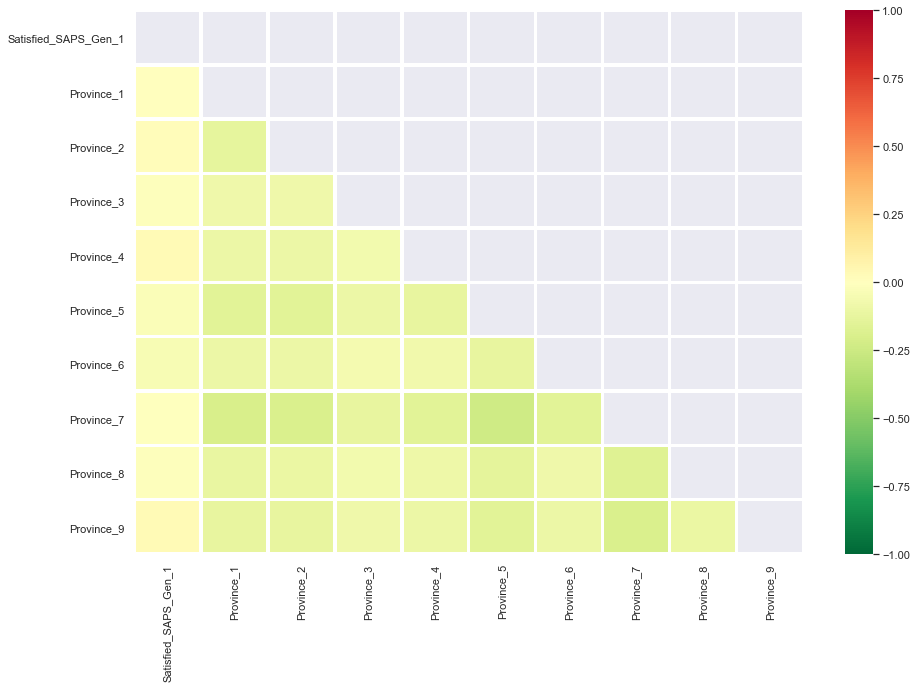

In [23]:
#5TH PLOT
fig, ax = plt.subplots(figsize=(15,10))
corr_df= d_all_dummies[['Satisfied_SAPS_Gen_1','Province_1','Province_2','Province_3','Province_4',\
                     'Province_5','Province_6', 'Province_7', 'Province_8', 'Province_9']].corr(method='pearson')
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

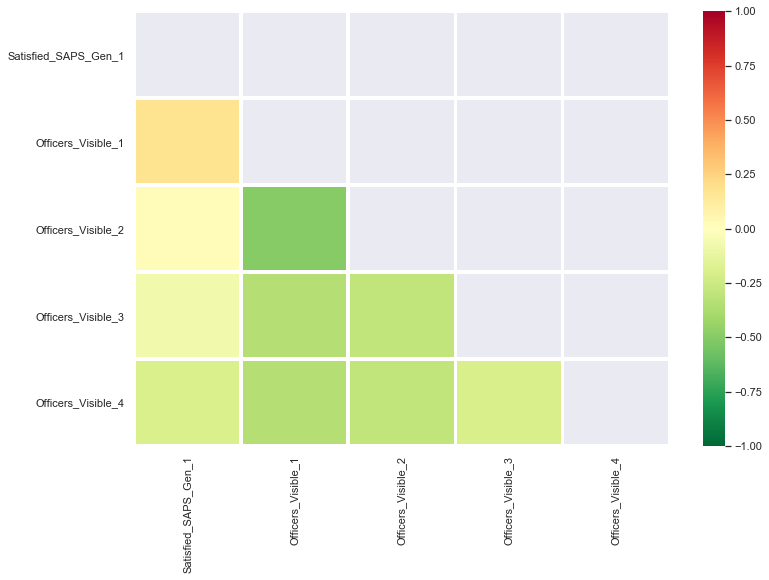

In [24]:
#6TH PLOT
fig, ax = plt.subplots(figsize=(12,8))
corr_df= d_all_dummies[['Satisfied_SAPS_Gen_1','Officers_Visible_1','Officers_Visible_2','Officers_Visible_3',\
                     'Officers_Visible_4']].corr(method='pearson')
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The first correlation plot shows there is a relationship between provinces and satisfaction with the police service and the second plot shows that there is a relationship between the occurences of officers being visible and satisfaction with the police service. We can see that there is a positive relationship between Province_2 and Satisfied_SAPS_Gen_1, a similar positive relationship exists with Province_4. There is a negative relationship between Province_5 and Satisfied_SAPS_Gen_1, as well as Province_6 and Satisfied_SAPS_Gen_1. In the second plot there is a positive relationship between Officers_Visible_2 and Satisfied_SAPS_Gen_1 as well as Officers_Visible_1 and Satisfied_SAPS_Gen_1. It should be noted that the relationships between satisfaction with SAPS and the various variables cannot be studied in isolation as interactions between indicator variables can affect these relationships too. Correlations between individual variables and the response variable are inadequate for us to draw conclusions.

# 5. Initial Modelling 

In this section the data will be fitted to Logit regression models to carry out preliminary investigation into the features that may relate to Satisfied_SAPS_Gen with the 2018 dataset. Firstly, the relationship between general satisfaction with SAPS and gender will be investigated. To accomplish this the gender data is used to fit a Logit regression model with general satisfaction with SAPS (Satisfied_SAPS_Gen), this can be seen below where the pseudo (McFadden) r-squared value is low which indicates that the model parameters hardly improve on the null model. Therefore this model is not good, although we do see that the coefficient of Gender_2 which represents being a female, decreases the log of odds of satisfaction with the SAPS by 0.1208. The Gender_2 coefficient is negative, it contributes towards a lower probability for Satisfied_SAPS_Gen and therefore may lead to a value which indicates no general satisfaction with SAPS. This may be incorrect as we are considering the variable in isolation.

In [25]:
formula = "Satisfied_SAPS_Gen ~ Gender_2"
gender2018_model = smf.logit(formula, d_2018_dummies).fit(fit_intercept=True, maxiter=100)
print(gender2018_model.summary())

Optimization terminated successfully.
         Current function value: 0.689367
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     Satisfied_SAPS_Gen   No. Observations:                19583
Model:                          Logit   Df Residuals:                    19581
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:               0.0006428
Time:                        00:22:51   Log-Likelihood:                -13500.
converged:                       True   LL-Null:                       -13509.
Covariance Type:            nonrobust   LLR p-value:                 3.083e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2152      0.019     11.348      0.000       0.178       0.252
Gender_2      -0.1208      0.

We apply the same process below as seen above, where race data is used to fit a Logit model with general satisfaction with SAPS. Once again the pseudo r-squared value is low and the model is not completely useful as some variables have confidence intervals which contain 0 and have insignificant p-values. Although, we should note that being apart of Race_2 and Race_3 versus Race_1 decreases the log of odds of general satisfaction with the SAPS, hence a lower probability which indicates no general satisfaction with SAPS. Being apart of Race_4 versus Race_1 increases the log of odds of general satisfaction with the SAPS.

In [26]:
formula2 = "Satisfied_SAPS_Gen ~ Race_2 + Race_3 + Race_4"
race2018_model2 = smf.logit(formula2, d_2018_dummies).fit(fit_intercept=True, maxiter=100)
print(race2018_model2.summary())

Optimization terminated successfully.
         Current function value: 0.686526
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     Satisfied_SAPS_Gen   No. Observations:                19583
Model:                          Logit   Df Residuals:                    19579
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                0.004761
Time:                        00:22:51   Log-Likelihood:                -13444.
converged:                       True   LL-Null:                       -13509.
Covariance Type:            nonrobust   LLR p-value:                 1.070e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1294      0.016      8.188      0.000       0.098       0.160
Race_2        -0.0978      0.

From results of models above it is necessary to fit a Logit regression model using all variables in our 2018 dataset.

In [27]:
d_2018_no_response = d_2018_dummies.drop(['Satisfied_SAPS_Gen','Year'],axis=1)
response_variable='Satisfied_SAPS_Gen'
formula = "{} ~ {} + 1".format(response_variable,' + '.join(d_2018_no_response.columns))
all2018_model = smf.logit(formula, d_2018_dummies).fit(fit_intercept=True, maxiter=100)
print(all2018_model.summary2())

Optimization terminated successfully.
         Current function value: 0.529162
         Iterations 6
                          Results: Logit
Model:              Logit              Pseudo R-squared: 0.233     
Dependent Variable: Satisfied_SAPS_Gen AIC:              20769.1668
Date:               2020-06-25 00:22   BIC:              20942.5800
No. Observations:   19583              Log-Likelihood:   -10363.   
Df Model:           21                 LL-Null:          -13509.   
Df Residuals:       19561              LLR p-value:      0.0000    
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     6.0000                                         
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           1.1338   0.0741  15.3036 0.0000  0.9886  1.2790
Access_police_2    -0.1319   0.0489  -2.6

In [29]:
print('Adjusted r-squared: ')
rsquared_adj = 1 - ((all2018_model.llf - (all2018_model.df_model+1))/all2018_model.llnull)
print(rsquared_adj)

Adjusted r-squared: 
0.23125832049543438


While we have a much higher pseudo R-squared, the adjusted (McFadden) R-squared is sill lower, therefore are still issues with the model. The confidence intervals for some of the variables include 0, which indicates that the quality of the model is bad and the AIC score is also high due to the amount of variables utilized. Although the LLR p-value is statistically significant when compared to the null model, we see that some variables are statistically insignificant (p-value > 0.05). Therefore, we need to select significant features and refit the model before any conclusions can be made.

# 6. Feature Selection

In this section we discuss the procedures used to find and narrow down the list of features  which will be used for the model.

Since this project investigates whether other variables are also related to general satisfaction with SAPS, we need to chose the correct variables to be included in the model. In order to reduce possible multi-collinearity problems between variables and the dummy variable trap, the first dummy variable for every category was removed in the encoding stage.  In order for us to further improve our feature selection, step-wise regression will be utilized. We simplify the process by splitting it into into two parts:<br/>

1) A procedure known as Forward-Backward feature selection will be performed, this procedure is based on p-values from statsmodels.api.Logit. We will have the most important features/variables to include in the final model once this procedure is complete. <br/>

2) Lastly a procedure known as Forward selection will be utilized with our chosen features/variables to fit an optimum model which shall be evaluated by the calculated adjusted (McFadden) R-squared values which mirror the adjusted R-squared values in OLS regression. <br/>

### 6.1 Variable preparation

In [30]:
#Get category names
final = d_2018_dummies.columns
#Remove Satisfied_SAPS_Gen and Year categories
final = final[2:]
final

Index(['Access_police_2', 'Level_pc_2', 'Level_pc_3', 'Level_vc_2',
       'Level_vc_3', 'Officers_Visible_2', 'Officers_Visible_3',
       'Officers_Visible_4', 'Province_2', 'Province_3', 'Province_4',
       'Province_5', 'Province_6', 'Province_7', 'Province_8', 'Province_9',
       'Race_2', 'Race_3', 'Race_4', 'Gender_2', 'Trust_SAPS_2'],
      dtype='object')

We first remove the response variable and the year variable from the variable list.

### 6.2  (1) Forward-Backward variable selection process

In this section the variables with the most significant p-values are chosen. A Logit regresion model is fit iteratively by adding variables into the formula and storing the variable with the lowest p-value in our 'included' list. This represents the forward step. For our backward step, the Logit regression model is fitted utilizing all of the variables in the 'included' list, and the variable with the largest p-value is selected. If the p-value of a variable exceeds a chosen threshold (0.05) then the variable shall not be added to the 'final' variable list.

In [31]:
"""
The function below perfroms our Forward-Backward variable selection process.

Input: A dataframe which contains all of the explanatory variables (Explanatory)
and a list containing the Response variable (Response).

Output: Two lists containing important variables and a list containing bad (discarded) variables.

"""

def regression_stepwise(Explanatory, Response):

    start_list=[]
    tol_in=0.001
    #Chosen threshold for p-values
    tol_out = 0.05
    add=True

    retained = list(start_list)
    #Store good values
    store1 = []
    #Store bad values
    store2 = []
    while True:

            different=False

            #ForwardProcess
            removed = list(set(Explanatory.columns)-set(retained))

            new_pvalue = pd.Series(index=removed)

            for x in removed:
                clear_output(wait=True)
                #Temporary model
                model = sm.Logit(Response, sm.add_constant(pd.DataFrame(Explanatory[ retained + [x]]))).fit()

                #Get p-values
                new_pvalue[x] = model.pvalues[x]

            #Select lowest p-value
            b_pvalue = new_pvalue.min()

            if b_pvalue < tol_in:

                #Get best feature
                b_feature = new_pvalue.idxmin()

                #Store best feature
                retained.append(b_feature)

                different=True

                if add==True:
                    #Store best feature
                    store1.append(b_feature)

            #BackwardProcess
            clear_output(wait=True)
            #Temporary model
            model = sm.Logit(Response, sm.add_constant(pd.DataFrame(Explanatory[retained]))).fit()

            #Make use of coefficients except intercept
            pvalues = model.pvalues.iloc[1:]

            #Select highest p-value
            w_pvalue = pvalues.max()

            if w_pvalue > tol_out:

                different=True
                #Get worst feature
                w_feature = pvalues.idxmax()

                #Remove worst feature
                retained.remove(w_feature)

                if add==True:

                    #Store worst feature
                    store2.append(w_feature)

            #Exit if done        
            if not different:

                break
                
    return retained, store1, store2
 
#Get a sample for training
sample_set=resample(d_2018_dummies,n_samples=5000, random_state=100000)
Explanatory = sample_set[final]
Response = sample_set['Satisfied_SAPS_Gen']

result, store1, store2 = regression_stepwise(Explanatory, Response)
            
hide_toggle()

Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6


In [32]:
print('Retained: ')
print(result)

Retained: 
['Trust_SAPS_2', 'Officers_Visible_4', 'Race_4', 'Level_pc_3', 'Level_vc_2', 'Officers_Visible_3', 'Officers_Visible_2', 'Level_vc_3', 'Province_6', 'Province_5']


The output from our Forward-Backward selection process of variables based on their p-value is shown above. It is important to note that even if a variable was significant in one model, it will not necessarily be significant for other models. A variable can be viewed as less significant when other variables are added to the model during the fitting step, therefore it is important to perform more than one iteration with different models, rather than individual p-values with one model.

### 6.3 (2) Forward Selection process for optimum model

In this section use our Forward selection process to fit the optimum model by utilizing the chosen variables. Logit regression models will be fitted while iteratively adding variables to the formula. The model is then evaluated using the adjusted (MacFadden) R-squared calculated by us for Logit regression which is similiar to the OLS adjusted R-squared, the variable with the associated R-squared adjusted value will beadded to a list. The variables with the best values are then added to the formula and the resulting model is returned.

In [33]:
"""
The function below performs forward selection for the optimum model.

Input: Dataframe with complete dataset (stored_data_2018) and list with response variable name (Response).

Output: Optimum model and list of variables in model.
"""

def regression_forward(stored_data_2018, Response):

    r = set(stored_data_2018.columns)
    r.remove(Response)
    chosen = []
    store3 = []
    curr = 0.0
    new = 0.0
    count=0

    while r and curr == new:

            values_with_var = []
            
            for var in r:
                clear_output(wait=True)
                formula = "{} ~ {} + 1".format(Response,' + '.join(chosen + [var]))
                #Fit model
                model = smf.logit(formula, stored_data_2018).fit(fit_intercept=True)
                
                #Get adjusted R squared for logit
                rsquared_adj = 1 - ((model.llf - model.df_model+1)/model.llnull)
                values_with_var.append((rsquared_adj, var))

            count= count + 1
            values_with_var.sort()
            new, best_x = values_with_var.pop()

            if curr < new or count >= 20:

                store3.append(best_x)
                count=0
                r.remove(best_x)
                #Keep best variables
                chosen.append(best_x)
                curr = new

    formula = "{} ~ {} + 1".format(Response,' + '.join(chosen))
    #Return forward selected model
    new_model = smf.logit(formula, stored_data_2018).fit(fit_intercept=True)
    
    return new_model, store3


hide_toggle()

In [34]:
result.append('Satisfied_SAPS_Gen')
stored_data_2018=sample_set[result]
Response= 'Satisfied_SAPS_Gen'

new_model, store3 = regression_forward(stored_data_2018, Response)

Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6


In [35]:
store3

['Trust_SAPS_2',
 'Officers_Visible_4',
 'Race_4',
 'Level_pc_3',
 'Level_vc_2',
 'Officers_Visible_3',
 'Officers_Visible_2',
 'Level_vc_3',
 'Province_6',
 'Province_5']

As seen above all the variables that where selected as significant based on their p-value are included in the final variable list for the optimal model. We sholud note that this may not always be the case since the p-value is not the only important metric used to determine whether including a variable will improve a model or not, and interactions between the different variables are also crucial to understand the shared relationships.

In [36]:
print(new_model.summary2())

                          Results: Logit
Model:               Logit              Pseudo R-squared: 0.230    
Dependent Variable:  Satisfied_SAPS_Gen AIC:              5345.3690
Date:                2020-06-25 00:22   BIC:              5417.0582
No. Observations:    5000               Log-Likelihood:   -2661.7  
Df Model:            10                 LL-Null:          -3454.7  
Df Residuals:        4989               LLR p-value:      0.0000   
Converged:           1.0000             Scale:            1.0000   
No. Iterations:      6.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.8983   0.0723  12.4236 0.0000  0.7565  1.0400
Trust_SAPS_2       -2.5986   0.0956 -27.1857 0.0000 -2.7860 -2.4113
Officers_Visible_4 -1.4020   0.0931 -15.0536 0.0000 -1.5846 -1.2195
Race_4 

In [37]:
print('Adjusted r-squared: ')
rsquared_adj = 1 - ((new_model.llf - (new_model.df_model+1))/new_model.llnull)
print(np.round(rsquared_adj,2))

Adjusted r-squared: 
0.23


Looking at the summary output above, the performance of the model is better in a number of ways when compared to the performance of the regression model using all the possible features, although there are some similarities. The AIC number is much lower in this model although our pseudo (MacFadden) R-squared and adjusted (MacFadden) R-squared did not improve. The p-values for all variables are statiscally significant and none of the confidence intervals contain 0. An attempt to further this model will be in the next section.

# 7. Hypothesis Testing/Inference

In this section our hypothesis testing/Inference shall be performed, this will be accomplished through bootstrapping which will be used for in-sample resampling. The bootstrap method will be utilized in two ways for this project. We will first use boostrapping to determine the best variables to include in our final model, using a resampling procedure. For each bootstrap sample, we utilize the step-wise regression process (from section 6) is performed and the chosen variable for that sample is saved. Lastly, bootstrapping will be utilized to create a distribution of the regression coefficients and to calculate the confidence intervals for each coefficient. We will use the coefficients to analyse any relationships that exist between the explanatory variables and general satisfaction with SAPS.

In [38]:
"""
The function below performs the bootstrapping process used for in-sample resampling.

Input: The dataset (d_2018_dummies), number of iterations to run (iterations) and the size of samples (size).

Output: Each model and their parameters, bse, p-values, confidence intervals and adjusted R-squared.
"""
def bootstrap_process(d_2018_dummies, iterations, size):
    #Storage for remaining models
    r_models=[]
    
    #Remove unnecessary variables if any exist
    improved = d_2018_dummies.columns
    improved = improved[2:]
    
    #Repeat process
    for x in range(0, iterations):
        
        clear_output(wait=True)
        
        #Sampling
        sample_train = resample(d_2018_dummies, n_samples=size, random_state=100000)
        
        #Variables
        Explanatory = sample_train[improved]
        Response = sample_train['Satisfied_SAPS_Gen']
        
        #Perform stepwise regression
        result,_,_ = regression_stepwise(Explanatory, Response)
        result.append('Satisfied_SAPS_Gen')
        
        #Get model
        model,_= regression_forward(sample_train[result], 'Satisfied_SAPS_Gen')
        
        #Calculate adjusted R-squared
        rsquared_adj = 1 - ((model.llf - model.df_model+1)/model.llnull)
        p = []
        
        #Store each model, parameters, bse, pvalues, confidence intervals and adjusted R-squared
        p = [model, model.params, model.bse, model.pvalues, model.conf_int(), rsquared_adj]
        r_models.append(p)
        
        print('iteration: {:}'.format(x))
        
    return r_models

d_2018_models = bootstrap_process(d_2018_dummies, 50, 5000)

Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6
iteration: 49


In [39]:
"""
The function finds the most likely variables to be included in the final model
by looking at the number of times it appears in a list of models and if the model it
appears in has a larger adjusted R-squared value than what is specified.

Input: A list of models (modelstore), a threshold for the adjusted R-squared value (thresh) and the
number of times we expect a variable to appear in the list to be chosen (frac).

Output: A list of valid variables for our model.
"""
def likely_variables(modelstore, thresh, frac):
    variables = {}
    inter = 'Intercept'
    #Look at each model in list
    for i in range(len(modelstore)):
        
        if ( modelstore[i][5] > thresh):
            
            f_store = list(modelstore[i][1].index)
            
            for x in f_store:
                
                try:
                    variables[x] += 1
                except:
                    variables[x] = 1
    v=[]
    
    for f_store, value in variables.items():
        test = f_store != inter
        #If model value appears a certain number of times and is not the intercept
        if ((value >= frac) and f_store != inter ):
            
            v.append(f_store)

    return v

valid_variables = likely_variables(d_2018_models,0.15,15)
print('Valid variables: ')
print(valid_variables)

Valid variables: 
['Trust_SAPS_2', 'Officers_Visible_4', 'Race_4', 'Level_pc_3', 'Level_vc_2', 'Officers_Visible_3', 'Officers_Visible_2', 'Level_vc_3', 'Province_6', 'Province_5']


We will now evaluate the performance of a model fit using the above variables.

In [40]:
Response='Satisfied_SAPS_Gen'
formula = "{} ~ {} + 1".format(Response,' + '.join(valid_variables))
sample_set = d_2018_dummies.drop(['Year'], axis = 1)

model = smf.logit(formula, sample_set).fit(fit_interept=True)
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.533961
         Iterations 6
                          Results: Logit
Model:              Logit              Pseudo R-squared: 0.226     
Dependent Variable: Satisfied_SAPS_Gen AIC:              20935.1126
Date:               2020-06-25 00:26   BIC:              21021.8192
No. Observations:   19583              Log-Likelihood:   -10457.   
Df Model:           10                 LL-Null:          -13509.   
Df Residuals:       19572              LLR p-value:      0.0000    
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     6.0000                                         
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.9043   0.0369  24.5335 0.0000  0.8321  0.9766
Trust_SAPS_2       -2.6228   0.0493 -53.2

In [41]:
print('Pseudo R-squared:')
np.round(model.prsquared, 2)

Pseudo R-squared:


0.23

In [42]:
print('Adjusted R-squared:')
rsquared_adj = 1 - ((model.llf - model.df_model+1)/model.llnull)
np.round(rsquared_adj,2)

Adjusted R-squared:


0.23

Although the AIC is high, every variable has value since the adjusted R-squared is equal to the pseudo R-squared. The standard errors are low which indicate the estimators of the coefficients are good, all the p-values for the variables are statistically significant and none of the confidence intervals contain zeros. Therefore the fitted model is good.

In [43]:
"""
The function below fits Logit regression models using variables
and samples from the data with the purpose of creating distributions of 
the coefficients for the different variables.

Input: The list of valid variables (valid_variables), the dataset (d_2018_dummies),
size of samples (size) and number of iterations (iterations).

Output: The model parameters (coefficients), bse, and confidence intervals.
"""
def likely_coefficients(valid_variables, d_2018_dummies, size, iterations):
    
    Response='Satisfied_SAPS_Gen'
    
    #Set formula
    formula = "{} ~ {} + 1".format(Response,' + '.join(valid_variables))
    result_coefs=[]
    
    for i in range(0,iterations):
        
        clear_output(wait=True)
        
        #Sample from data
        sample_train = resample(d_2018_dummies, n_samples=size, random_state=100000)
        
        #Drop year column
        sample_set = sample_train.drop(['Year'], axis = 1)
        
        #Set logit model 
        model = smf.logit(formula, sample_set).fit(fit_intercept = True)
        
        #Store model parameters, bse, confidence intervals
        result_coefs.append([model.params, model.bse, model.conf_int()])
        
    return result_coefs

coefs = likely_coefficients(valid_variables, d_2018_dummies, 5000, 2000)

Optimization terminated successfully.
         Current function value: 0.532337
         Iterations 6


To test the model and variables computed by the previous process, the resampling process is required to create a distribution of the logit regression coefficients for the individual variables. The mean of the distribution will then be computed and the result will be utilized to identify any relations between the variables and general satisfaction with SAPS.

In [44]:
"""
The function below gets the mean and confidence intervals for coefficients
of each variable

Input: List of coefficients for each variable from models of different samples (coefs),
list of valid variables names (valid_variables).

Output: A list which contains the mean and confidence intervals for each variable.
"""
def confidence_intervals(coefs, valid_variables):
    
    r=[]
    for x in range(1,len(valid_variables) + 1):
        
        params=[]
        
        for y in range(0,len(coefs)):
            
            #Store coefficient parameters
            params.append(coefs[y][0][x])
            
        #Store ranges    
        r.append(params)
        
    mean_conf_interval=[]
    
    for k in range(0,len(valid_variables)):
        
        t = np.array(r[k])
        mean_param = t.mean()
        t.sort()
        conf_interval = np.percentile(t,[2.5,97.5])
        mean_conf_interval.append([mean_param, conf_interval])
        
    return mean_conf_interval

conf_interval = confidence_intervals(coefs, valid_variables)

for i in range(0,len(valid_variables)):
    print('Variable: {}'.format(valid_variables[i]))
    print('mean of coefficient (log of odds): {}'.format(conf_interval[i][0]))
    print()
hide_toggle()

Variable: Trust_SAPS_2
mean of coefficient (log of odds): -2.5986178229287735

Variable: Officers_Visible_4
mean of coefficient (log of odds): -1.4020458625210603

Variable: Race_4
mean of coefficient (log of odds): 1.077225751121682

Variable: Level_pc_3
mean of coefficient (log of odds): 0.4083500700114752

Variable: Level_vc_2
mean of coefficient (log of odds): 0.7587805067355382

Variable: Officers_Visible_3
mean of coefficient (log of odds): -0.8098322205984645

Variable: Officers_Visible_2
mean of coefficient (log of odds): -0.5557241194178248

Variable: Level_vc_3
mean of coefficient (log of odds): 0.472653370039896

Variable: Province_6
mean of coefficient (log of odds): -0.5017479481073559

Variable: Province_5
mean of coefficient (log of odds): -0.3227274951717591



The coefficients are in log of odds units as seen above, they are therefore harder to interpret. Threrefore we will convert them to odds ratios by exponentiating them as seen below, and then explain them.

In [45]:
for i in range(0,len(valid_variables)):
    print('Variable: {}'.format(valid_variables[i]))
    print('Odds ratios of coefficient: {}'.format(np.exp(conf_interval[i][0])))
    print()

Variable: Trust_SAPS_2
Odds ratios of coefficient: 0.07437630843045955

Variable: Officers_Visible_4
Odds ratios of coefficient: 0.2460929761759005

Variable: Race_4
Odds ratios of coefficient: 2.9365215984516957

Variable: Level_pc_3
Odds ratios of coefficient: 1.504333691116074

Variable: Level_vc_2
Odds ratios of coefficient: 2.1356701963857545

Variable: Officers_Visible_3
Odds ratios of coefficient: 0.4449327105047716

Variable: Officers_Visible_2
Odds ratios of coefficient: 0.5736567147956356

Variable: Level_vc_3
Odds ratios of coefficient: 1.6042452071360764

Variable: Province_6
Odds ratios of coefficient: 0.6054714016277157

Variable: Province_5
Odds ratios of coefficient: 0.7241711676219369



The results above are with respect to dummy variables and shall therefore be explained in terms of the baseline dummy variable which was dropped in the encoding process. From the results above we can see that for not trusting the SAPS (Trust_SAPS_2) the odds of general satisfaction with SAPS are 0.07 times as large as the odds for trusting the SAPS (Trust_SAPS_1) and having general satisfaction with SAPS. Therefore a citizen who trusts the SAPS is more likely to have a general satisfaction with their service.<br/>

The variables Officers_Visible_2, Officers_Visible_3 and Officers_Visible_4 indicate decreasing odds towards general satisfaction with SAPS which implies that as the SAPS become less frequently seen, citizens will be less likely to be statisfied with their service in general. Therefore the more frequently an officer is seen on duty, Officer_Visible_1, the larger the odds of a citizen having a general satisfaction with SAPS.<br/>

For a citizen being apart of Race_4 (white) the odds of general satisfaction with SAPS are approximately 2.94 times as large as the odds of a citizen being apart of Race_1 (afican/black). This may indicate possible preferential treatment towards Race_4 as this result implies citizen of Race_1 are less likely to have general satisfaction with SAPS. <br/>

A citizen that views property crime levels to have remained the same (Level_pc_3) with the odds of having general satisfaction with SAPS are approximately 1.5 times as large as the odds of a citizen that views property crime levels to have increased (Level_pc_1). A citizen that views violent crime to have decreased or remained the same (Level_vc_2 and Level_vc_3) with the odds of having general satisfaction with SAPS are approximately 2.14 and 1.60 times as large as the odds of a citizen that views levels of violent crime to have increased (Level_vc_1) having a general satisfaction with the SAPS. These results are imply that citizens who view crime levels to have increased as less likely to have a general satisfaction with the SAPS.<br/>

Citizens who reside in Kwa-Zulu Natal (Province_5) and North-west (Province 6) with the odds of having general satisfaction with SAPS are approximately 0.72 and 0.61 times as likely as the odds of a citizen that resides in Western Cape (Province_1) having a general satisfaction with SAPS. There the citizens in Province_5 and Province_6 are less likely to be satisfied with SAPS service.

# 8. Change in coefficients over the years

In this section we observe how the regression coefficient values change over the period of 2015-2018. In order to accomplish this, the procedure described in the previous section is used with the data from each year and the selected variables from all years. The coefficients for these selected variables are then calculated and the mean coefficients (log of odds) which will be converted to odds ratios, for each variable across every year is plotted to view the behaviour of the coefficients over the time period of 2015-2018.

In [46]:
#Bootstraping for 2018 run for 50 iterations from a sample of 5000
d_2018_models = bootstrap_process(d_2018_dummies,50,5000)

#Bootstraping for 2017 run for 50 iterations from a sample of 5000
d_2017_models = bootstrap_process(d_2017_dummies,50,5000)

#Bootstraping for 2016 run for 50 iterations from a sample of 5000
d_2016_models = bootstrap_process(d_2016_dummies,50,5000)

#Bootstraping for 2015 run for 50 iterations from a sample of 5000
d_2015_models = bootstrap_process(d_2015_dummies,50,5000)

Optimization terminated successfully.
         Current function value: 0.518462
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518462
         Iterations 6
iteration: 49


In [47]:
"""
The function below calculates the mean pseudo R-squared
from a list of models.

Input: A list containing multiple models.

Output: The mean pseudo R-squared.
"""
def mean_r_sq(m_list):
    
    r_squared=[]
    
    for i in range(0,len(m_list)):
        
        r_squared.append(m_list[i][5])
        
    m = np.array(r_squared).mean()
    
    return m

#Get most likely variables for 2018
common_2018 = likely_variables(d_2018_models, mean_r_sq(d_2018_models), 17)

#Get most likely variables for 2017
common_2017 = likely_variables(d_2017_models, mean_r_sq(d_2017_models), 17)

#Get most likely variables for 2016
common_2016 = likely_variables(d_2016_models, mean_r_sq(d_2016_models), 17)

#Get most likely variables for 2015
common_2015 = likely_variables(d_2015_models, mean_r_sq(d_2015_models), 17)

print('Chosen variables for each year:')

print('2015: {:}'.format(common_2015))

print('2016: {:}'.format(common_2016))

print('2017: {:}'.format(common_2017))

print('2018: {:}'.format(common_2018))

Chosen variables for each year:
2015: ['Trust_SAPS_2', 'Race_4', 'Officers_Visible_4', 'Officers_Visible_3', 'Level_pc_2', 'Level_pc_3', 'Officers_Visible_2', 'Access_police_2', 'Province_2', 'Province_6']
2016: []
2017: ['Trust_SAPS_2', 'Officers_Visible_4', 'Officers_Visible_3', 'Officers_Visible_2', 'Level_pc_2', 'Level_pc_3', 'Race_4', 'Province_2', 'Province_9']
2018: ['Trust_SAPS_2', 'Officers_Visible_4', 'Race_4', 'Level_pc_3', 'Level_vc_2', 'Officers_Visible_3', 'Officers_Visible_2', 'Level_vc_3', 'Province_6', 'Province_5']


Output above shows selected variables for each year. Although we can see that the same variables are not selected every year which is an indication that relationships between the dependent variable and explanatory variables differ from year to year. Variables such as Officers_Visble_4, Officers_Visble_3, Officers_Visble_2, Race_4 appear consistently in all the years with the exception of 2016.

In [48]:
final_list = common_2018 + common_2017 + common_2016 + common_2015
v_all = list(set(final_list))
v_all

['Province_5',
 'Level_pc_3',
 'Race_4',
 'Province_2',
 'Access_police_2',
 'Officers_Visible_3',
 'Level_vc_3',
 'Trust_SAPS_2',
 'Officers_Visible_2',
 'Level_vc_2',
 'Province_9',
 'Officers_Visible_4',
 'Level_pc_2',
 'Province_6']

The output above is our final variable list for our model. The regression coefficients the above variables for the different years will be computed below and how the coefficients differ over the period of 2015-2018 will be shown through the use of a graph.

In [49]:
#Get most likely coefficients for 2018
coefs_2018 = likely_coefficients(v_all, d_2018_dummies, 5000, 1000)

#Get most likely coefficients for 2017
coefs_2017 = likely_coefficients(v_all, d_2017_dummies, 5000, 1000)

#Get most likely coefficients for 2016
coefs_2016 = likely_coefficients(v_all, d_2016_dummies, 5000, 1000)

#Get most likely coefficients for 2015
coefs_2015 = likely_coefficients(v_all, d_2015_dummies, 5000, 1000)

Optimization terminated successfully.
         Current function value: 0.517330
         Iterations 6


In [50]:
#Get confidence intervals for 2018
confidence_interval2018 = confidence_intervals(coefs_2018, v_all)

#Get confidence intervals for 2017
confidence_interval2017 = confidence_intervals(coefs_2017, v_all)

#Get confidence intervals for 2016
confidence_interval2016 = confidence_intervals(coefs_2016, v_all)

#Get confidence intervals for 2015
confidence_interval2015 = confidence_intervals(coefs_2015, v_all)

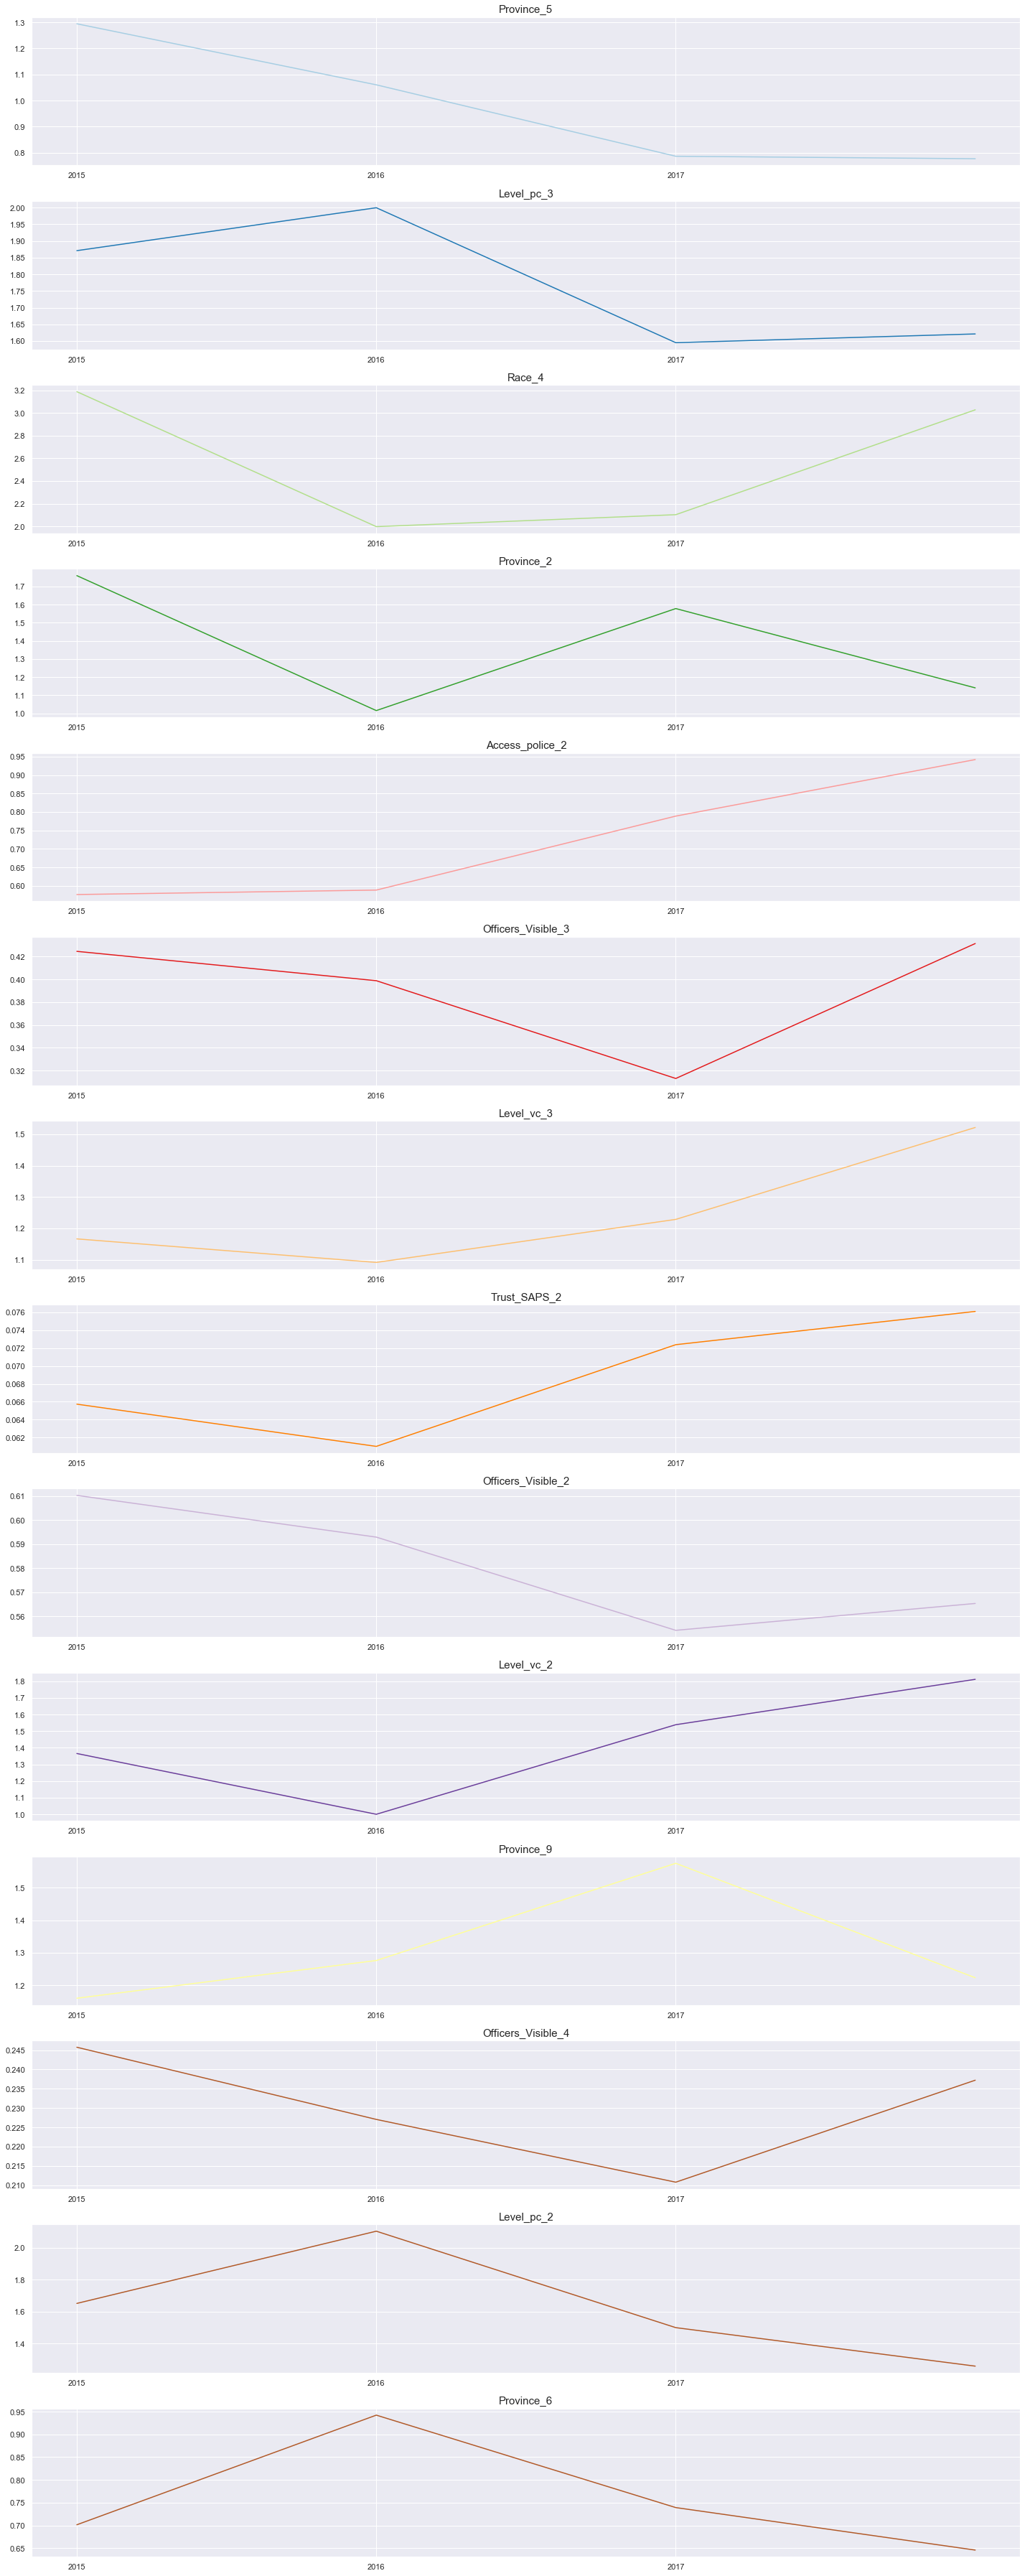

In [51]:
#convert the coefficient data to plot
years=[2015,2016,2017,2018]
conf_ints=[confidence_interval2015, confidence_interval2016, confidence_interval2017, confidence_interval2018]
temps=[]

for i in range(0,len(v_all)):
    
    temp=[]
    
    for j in range(0,4):
        
        temp_conf_int=conf_ints[j][i][0]
        
        #Exponentiate coefficients to get odds ratios
        temp.append(np.exp(temp_conf_int))
        
    temps.append(temp)
    
# Coefficents for the most common features over the period of (2015-2018)
sns.set()
ax=plt.figure(figsize=(20,50))
cmap = plt.get_cmap('Paired')

for i in range(0,len(v_all)):
    
    plt.subplot(len(v_all),1,i+1)
    plt.plot(years,temps[i],c=cmap(i))
    plt.xticks(np.arange(2015, 2018, 1)) 
    
    name = v_all[i]
    plt.title(name,fontsize=15)
    plt.tight_layout()
    
plt.show()

The plots above indicate that the regression coefficients (odds ratios) of our variables does not stay constant over the time period of 2015 to 2018. This therefore shows that the relationship of the variable to general satisfaction with SAPS changes over time. We should note that over the years, certain variables go above or below zero, while the relationship of other variables decrease or increase more. This is a clear indication that the same variables do not have the same relationship or significance to general satisfaction with SAPS over this period of time. Therefore, results from one time period can not be generalised for the entire time period we are investigating.

# 9. Conclusion

#### Answer to research question

The tests above have shown that there is a joint relationship between the race, some locations, police visibility, trust in the SAPS, levels of violent and property crime to the general satisfaction with SAPS in South Africa. While the explanatory variables may be related to general satisfaction with SAPS, there may be additional variables to consider.

#### Short comings of research

Our results in the above project can not be generalised to the entire population since datasets used in this project are not representative of the entire population of the country. If a more representative sample of data from the country is made available then it may be possible to generalise our results and answer even more questions.

#### Future considerations

More variables may be needed to find stronger relationships to answer more complex questions and verify existing ones in this project.